# 계층적 클러스터링

## 라이브러리와 데이터 준비

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [35]:
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

In [36]:
data.shape

(5, 2)

In [37]:
data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

## sklearn의 Hierarchical Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering  

# AgglomerativeClustering은 하향식(agglomerative) 계층적 군집 알고리즘의 scikit-learn 구현

single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="single"  # 트리를 끝까지 병합,  싱글 링크(최단 거리 기준)
)

In [39]:
single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

## 덴드로그램 그리기용 보조 함수 정의

In [40]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,  # scikit-learn 객체를 SciPy dendrogram 함수가 읽을 수 있는 linkage 행렬로 변환
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])

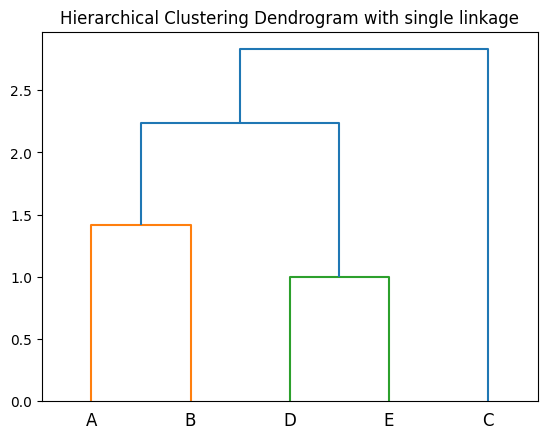

In [ ]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode='level', p=3) # truncate_mode='level', p=3은 상위 3단계까지만
plt.show()


## 클러스터 수를 2개로 고정해 재학습

In [42]:
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage="single"
)

In [43]:
single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [52]:
single_cluster_2.labels_

array([0, 0, 1, 0, 0], dtype=int64)

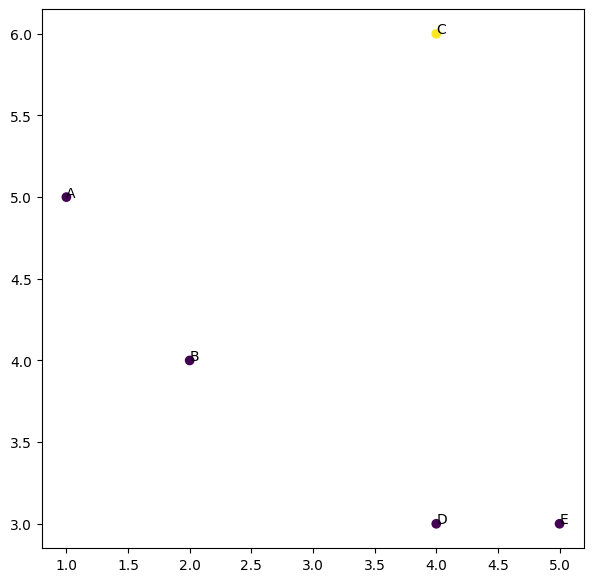

In [ ]:
# 산점도에 색을 입혀 두 클러스터가 실제 공간에서 어떻게 나뉘는지 보여줌

plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

## 클러스터 수를 3개로 고정해 재학습

In [53]:
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage="single"
)

In [54]:
single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [55]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2], dtype=int64)

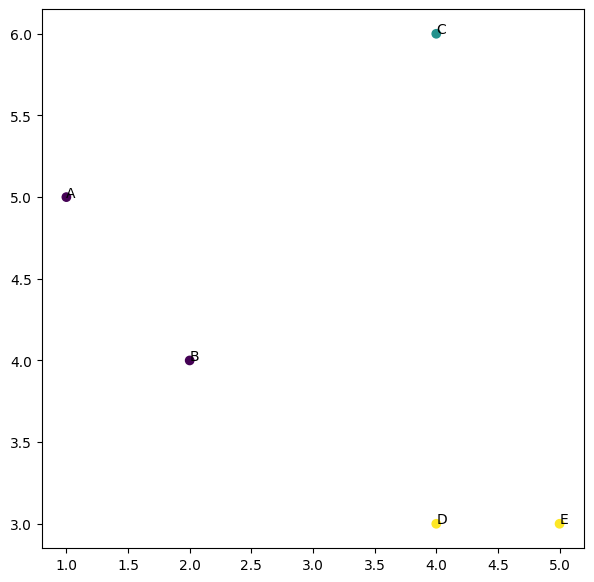

In [ ]:
# 산점도에 색을 입혀 두 클러스터가 실제 공간에서 어떻게 나뉘는지 보여줌

plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

## 평균 연결법

In [58]:
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="average"
)

In [59]:
avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

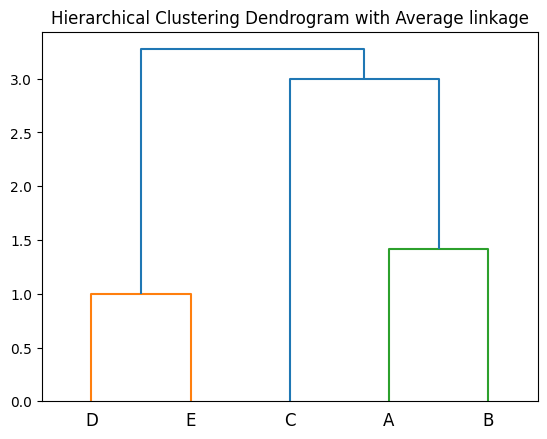

In [61]:
plt.title('Hierarchical Clustering Dendrogram with Average linkage')
plot_dendrogram(avg_cluster, truncate_mode='level', p=3)
plt.show()

## 최장 연결법

In [62]:
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="complete"
)

In [63]:
max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

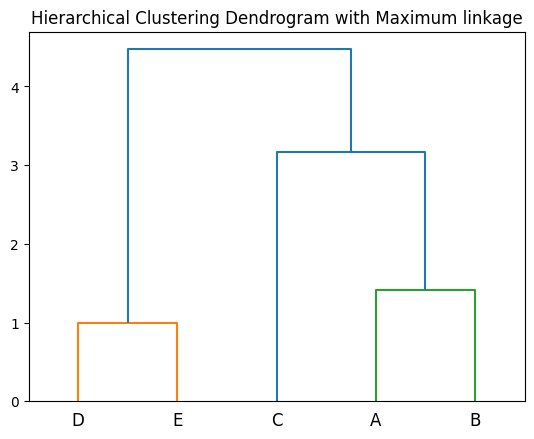

In [64]:
plt.title('Hierarchical Clustering Dendrogram with Maximum linkage')
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

## 중심연결법

In [65]:
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="ward"
)

In [66]:
centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

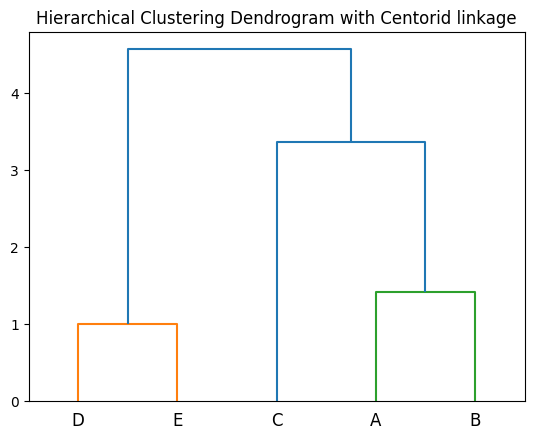

In [67]:
plt.title('Hierarchical Clustering Dendrogram with Centorid linkage')
plot_dendrogram(centroid_cluster, truncate_mode='level', p=3)
plt.show()

## 여러 연결법을 비교하여 시각화 하기

In [25]:
clusters = [
    ("Single", single_cluster),
    ("Average", avg_cluster),
    ("Maximum", max_cluster),
    ("Centroid", centroid_cluster),
]


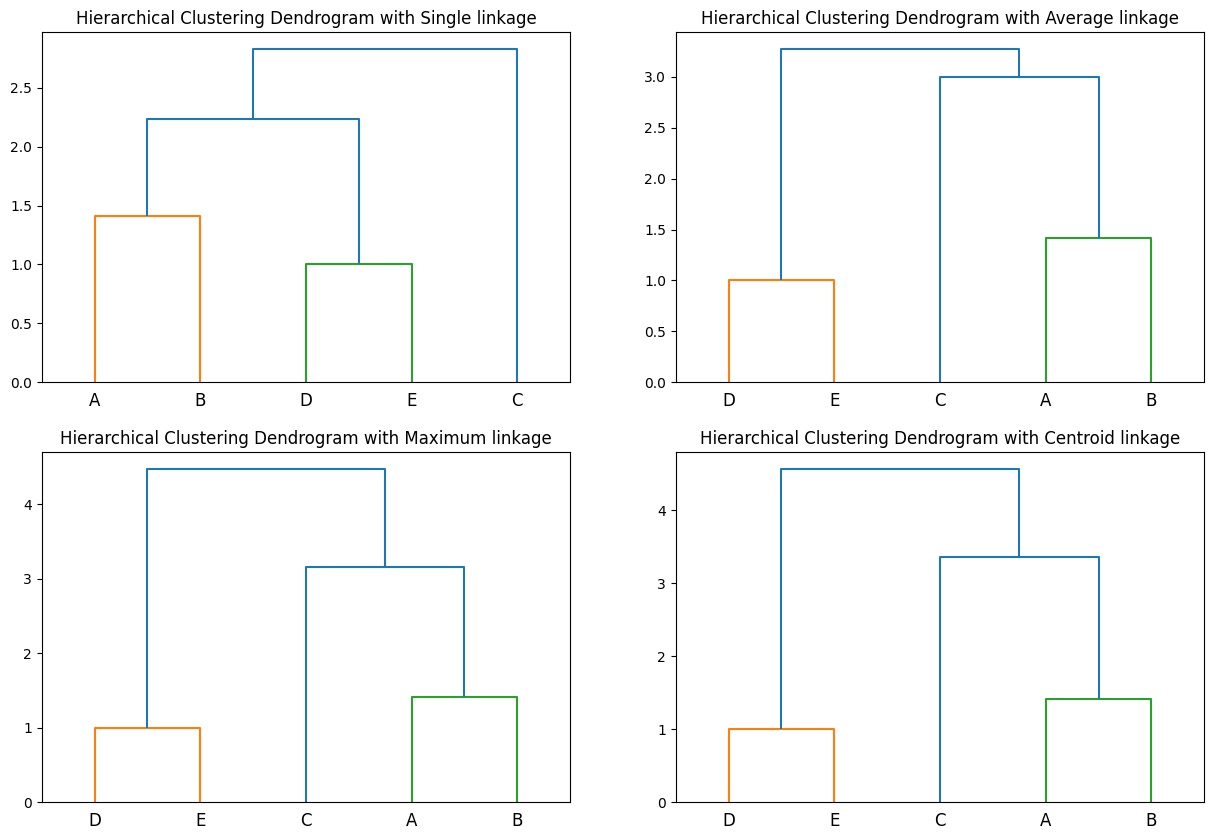

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
    ax = axes[idx//2, idx%2]
    ax.set_title(f'Hierarchical Clustering Dendrogram with {name} linkage')
    plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)